<a href="https://colab.research.google.com/github/Skkkiiideeee/AIML/blob/main/carsclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
cars=pd.read_csv('/content/car_data.csv')

In [5]:
cars

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [7]:
cars.dtypes

User ID          int64
Gender          object
Age              int64
AnnualSalary     int64
Purchased        int64
dtype: object

In [9]:
cars.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [10]:
def tocheckunique(Sheet):
    for i in Sheet:
        print(i,'\n')
        print(Sheet[i].unique(),'\n')
tocheckunique(cars)

User ID 

[ 385  681  353  895  661  846  219  588   85  465  686  408  790  116
  118   54   90  372  926   94  338  134  821  294  597  567   20  108
  105  994  273  263  423   88   81  257  755  249  121  489  555  222
  590  645  689  646  964  384  826   27  268  466  411  445  428  974
  828  348  730  820  917   15  365  674   30  531  190  160  371  321
  230  819  965  351  266  629  891  311  439  861  510  277  417  123
  912  667  435  722  892  279  500  684  414  349  456  485  960  233
  191  471  977  120  126   23  225  772  398  367  511  775  324  829
  478  546  942  571  375  905  132  438  972  596  395  663  903   25
  599  563  607  928  453  509  203  450  573  662  651   19  634  647
  693  728  520  213  142  322  540  743  887  241  701  848  782  877
  924   83  369  579  583  919  957  973  521   41   42  327  347  148
  443  700  738  527  742  175  335  996  378  655  104  221  786  536
  460  710  524  890   46   95   78  402  264   34  522  156  850  

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
cars.columns

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [15]:
fig = px.box(data_frame=cars, y='Age')
fig.show()

fig = px.box(data_frame=cars, y='AnnualSalary')
fig.show()

In [16]:
LE=LabelEncoder()
cars['Gender']=LE.fit_transform(cars['Gender'])

In [17]:
cars.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0


<Axes: >

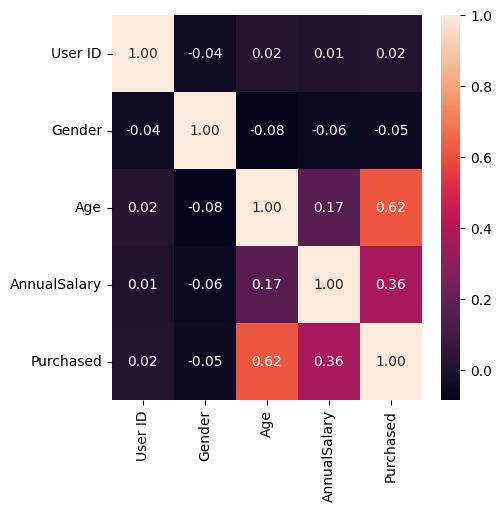

In [20]:
plt.figure(figsize=(5, 5))
sns.heatmap(cars.corr(),annot=True,fmt=".2f")

In [23]:
x=cars.drop(["User ID","Purchased"],axis=1)
y=cars["Purchased"]
print(x.shape)
print(y.shape)

(1000, 3)
(1000,)


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [43]:
dt_params = {'criterion': 'entropy',
             'max_depth': 10,
             'max_features': None,
             'min_samples_leaf': 4,
             'min_samples_split': 10}
dt = DecisionTreeClassifier(**dt_params, random_state=0)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10, random_state=0)

In [44]:
y_pred=dt.predict(x_test)


Accuracy: 94.50%
Confusion Matrix:


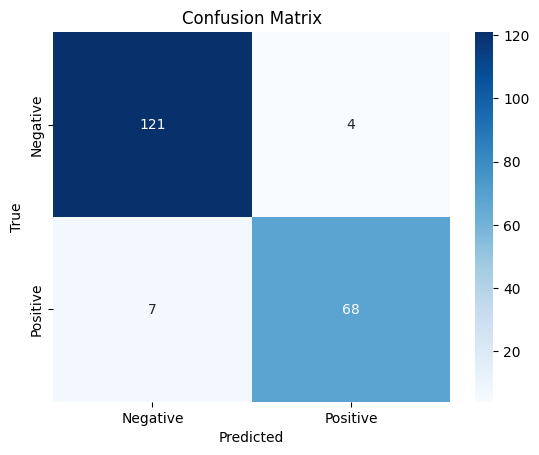

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       125
           1       0.94      0.91      0.93        75

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [45]:
accuracy = accuracy_score(y_test,y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(y_test,y_pred))

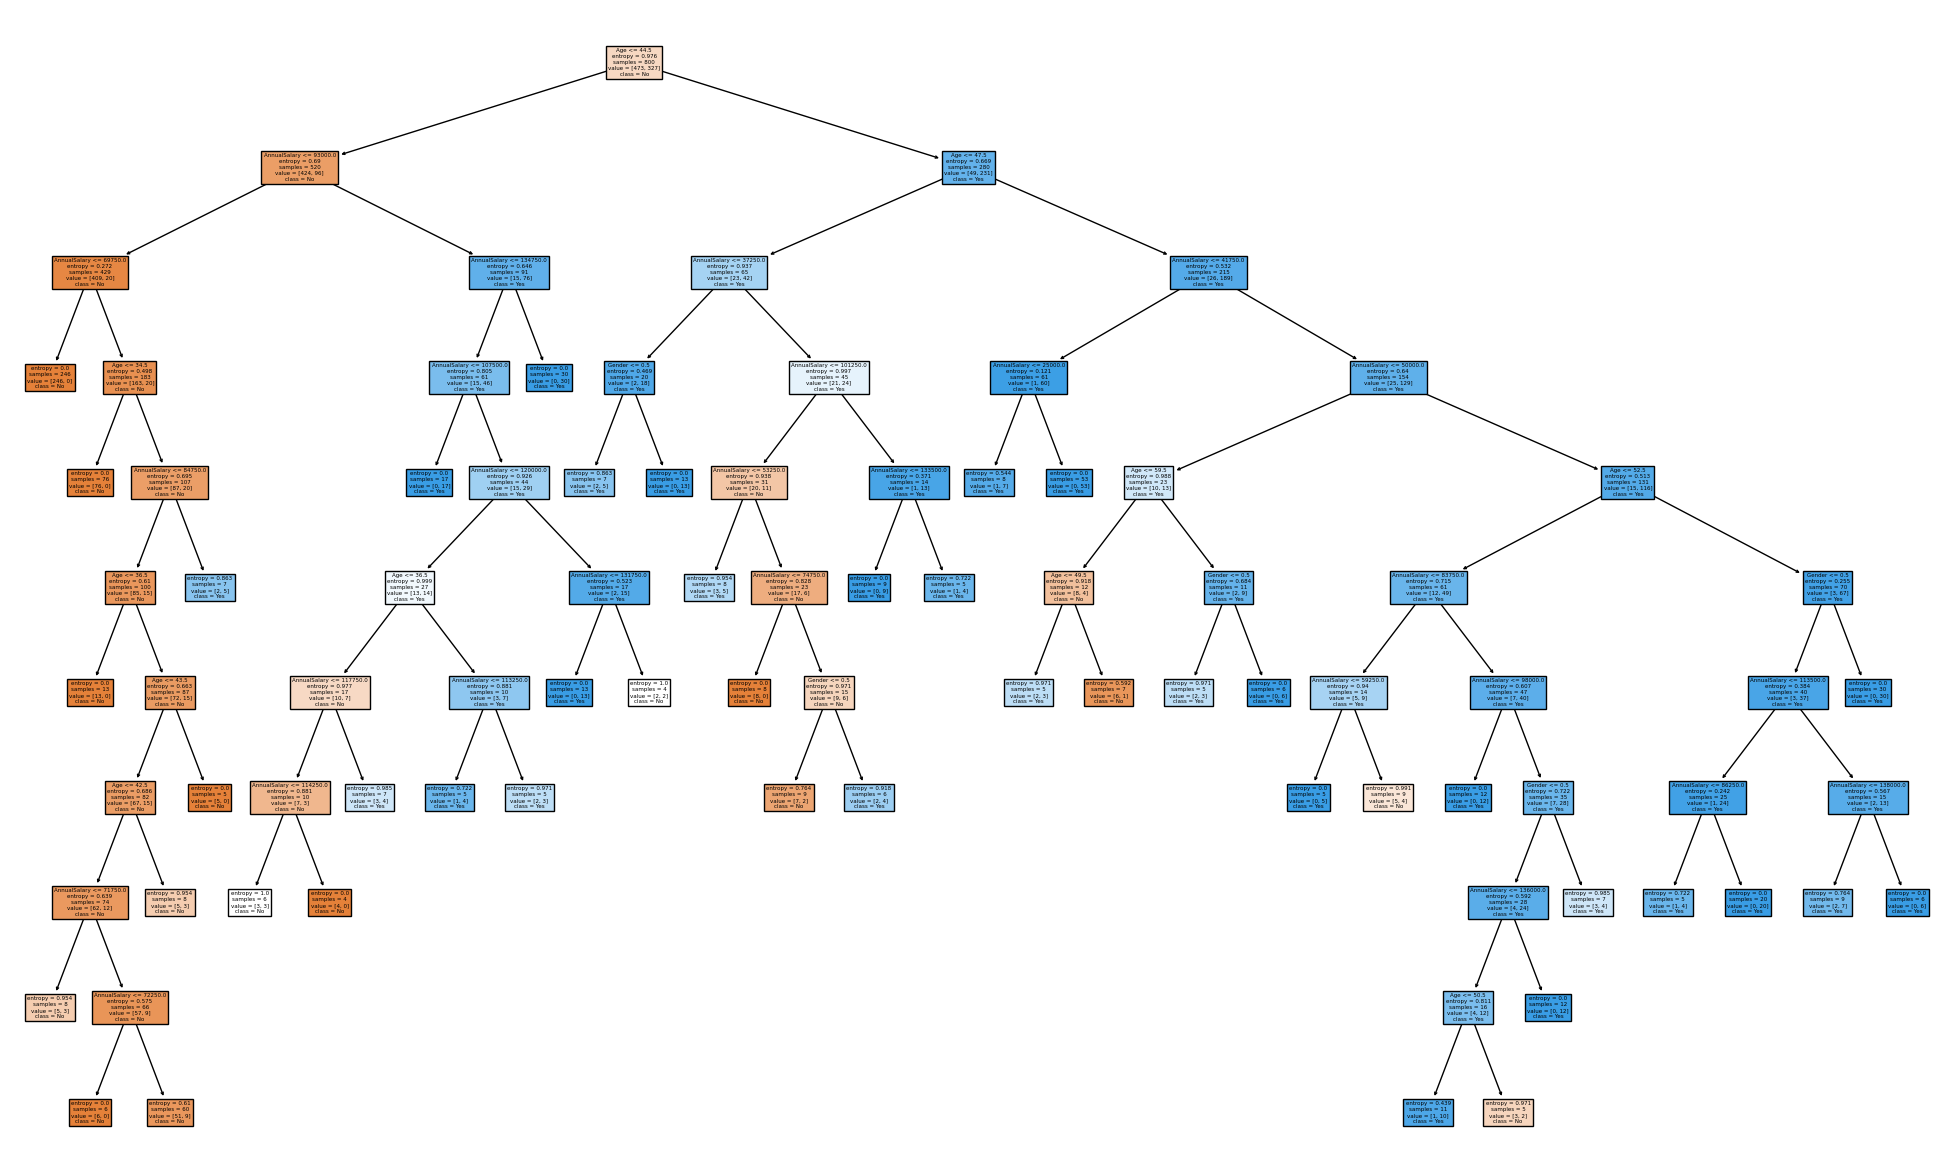

In [47]:
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(dt, filled=True, feature_names=x.columns, class_names=["No", "Yes"])
plt.show()